## Intro

**Machine learning :**
- regression (trying to predict with lots of variables for example how long someone will live)
- classification (trying to classify patients that are sick or not)

** Why in biology**
- Today we are going away from 3 values against 3 values
- Not big data : which is about how to store, work in parallel ....

** How **
- Machine learning is about finding the right function and then optimizing it


## Starting with R

In [1]:
setwd("~/Dropbox/These/Cours_CRI_Pasteur/Machine_learning")

In [6]:
data1=read.table("ex12.7.1.dat", header = T)

In [8]:
head(data1)

,x,y
1,1,1.229735
2,2,0.143176
3,3,2.96746
4,4,3.752269
5,5,5.802726
6,6,6.492615


In [9]:
summary(data1)

       x               y          
 Min.   : 1.00   Min.   : 0.1432  
 1st Qu.: 3.25   1st Qu.: 3.1637  
 Median : 5.50   Median : 6.1477  
 Mean   : 5.50   Mean   : 5.6974  
 3rd Qu.: 7.75   3rd Qu.: 8.3754  
 Max.   :10.00   Max.   :10.3181  

data[line,colum,]

In [12]:
data1$x
data1[1,]

[1]  1  2  3  4  5  6  7  8  9 10

,x,y
1,1,1.229735


## Class : linear models

**Main concept**
- train a model on this data
- give the model a new input
- check if it can predict what you want

***First model : ***
- linear model

In [14]:
mod=lm(data1$y ~ data1$x)

abline extracts the slope and the intercept of the model and plot it

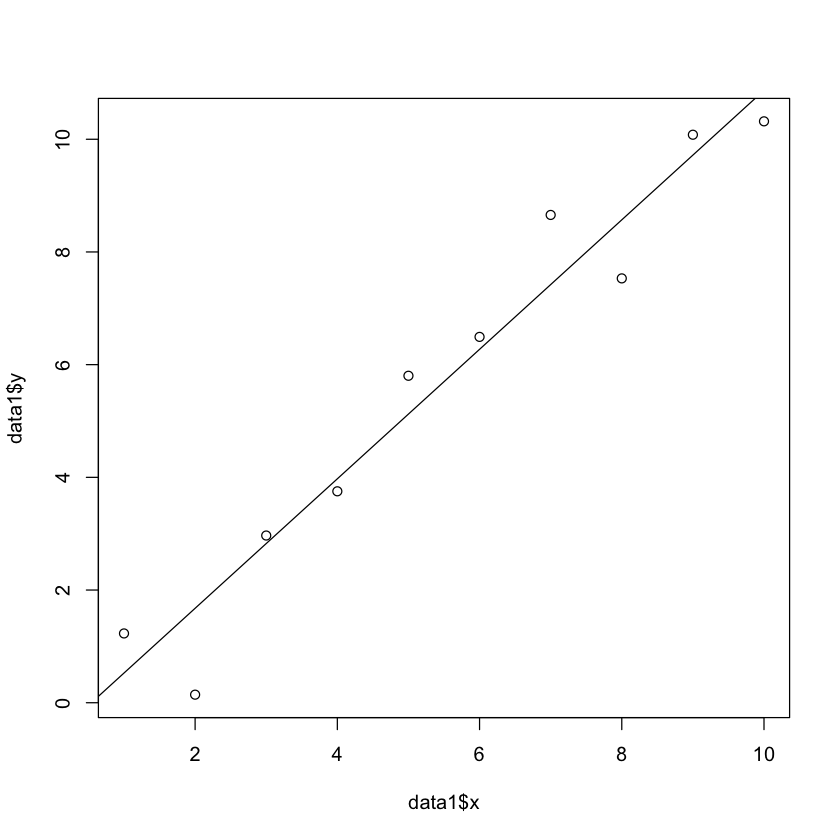

In [18]:
plot(data1$y ~ data1$x)
abline(mod)

Here what you are trying ot minimize is th e distance between the points and the model. 
QUestion, how do we measure the distance between the points and the models.
In many cases, the model is only taking the vertical distance => you don't give the same role to x and y. For many things, it's okay, but if you have two experimental variable in x and y (like weight and height), not okay


*** What is the function that minimize the distance between the points and the model.***

- n: Number of observations // number of lines
- p: Dimension of the problem // number of columns


- If n = p : it works well
- If n >>> p : big data, lots of points for a few variables
- If n <<< p : a few patients,but lots of data about those


- xi : Input of the model for patient / experiment / sample /line i (can be a number, or more complex)
- yi : Output of the experiment (can be a number, a matrix, a class)
- xi => Model => f(xi, parameters) != yi (because model is not perfect)


- Minimum : $(yi-f(xi,param))$
- Not working because "outliers" have a too big effect
- **How to handle outliers ?** Some techniques are built in
- Either take the square or absolute values
- Sum(yi-f(xi,param))2
- Sum(yi-(axi+b))2=f(a,b) with f(a,b) being as small as possible 
- Train the model to predict a and b (machine learning) => optimize it
- deep learning : estimate accurately parameters  (so basically, you estimate more than two parameter, you can always estimate more paremeters, but if you have more information that parameters, it will not be good)
- trade off between how robust is your model and how well it fits the point 
- you ask to fit a line, parabol (x2), polynomial to the degree 5


- function predict find f(a,b)

** fitting a poly**

In [29]:
mod=lm(data1$y ~ data1$x)

In [45]:
mod.poly=lm(data1$y ~ poly(data1$x,8,raw= T))
# try to find the best linear model with the polynomes

In [47]:
mod.poly


Call:
lm(formula = data1$y ~ poly(data1$x, 8, raw = T))

Coefficients:
               (Intercept)  poly(data1$x, 8, raw = T)1  
                 5.096e+00                   5.654e+00  
poly(data1$x, 8, raw = T)2  poly(data1$x, 8, raw = T)3  
                -2.320e+01                   2.012e+01  
poly(data1$x, 8, raw = T)4  poly(data1$x, 8, raw = T)5  
                -7.958e+00                   1.696e+00  
poly(data1$x, 8, raw = T)6  poly(data1$x, 8, raw = T)7  
                -2.010e-01                   1.246e-02  
poly(data1$x, 8, raw = T)8  
                -3.146e-04  


### Overfitting 
- When you fit your data really well , but cannot predict => model is too complicated. 
- We'll see example how do you keep your model general enough
- the key for a good classification or regression : train on a specific set of data and test it on another, else you'll always have overfitting !!!!
- Better to "reduce dimension" before training model, to avoid overfitting


### Comparing models
- compare model1 output as a function of Var1 with model 2 as a function of Var2
- also compare with model(var1,var2)
- trade off : fit the model as much as you could with the minimum number of parameters
- simplest way to compare two linear models : ANOVA
- if you want to trust which one is the best : you want to test if the most complicated is different from simple one ; if not choose the simple one
- ((RSS1-RSS2)/(p2-p1))/(RSS2/(n-p2)) with model 1 being complicated and model 2 the simple. The smaller the top ratio, the most similar the model => implementing the trade off
- for this : one model has to be an extension of the other (linear model)

### Example
- Antibiotic resistance with pH, temperature, ...
- Build linear models with those different parameters and then compare them

### Other possibility
- Tradeoff in a parameter
- Sum(yi-f(xi,param)2+ X
- Basically X is a penalty. Most famous :

#### Lasso
- $\lambda\times \mid a\mid+\lambda\times \mid b \mid$
- How do you choose lambda, if lambda =0 you go back to least square regression
- If lambda is high try to get the model to zero parameters : some parameters will go to zero and you don't loose much. High is when the term on the right is bigger than on the left.
- Basically you find the range by looking at when everything is at zero 

#### Ridge
- $[ ] + lambda*a^2 + lambda*b^2$
- same thing but basically everything goes down together

#### Elastic net
- One thas is used a lot is a combination of both
- weighted average
- $[] + alpha*sum(param) + (1-alpha)*sum(param)$

##GOAL FITTING POINTS WITH MINIMUM NUMBER OF PARAMETERS

## Examples from Yann

**Regression linéaire**

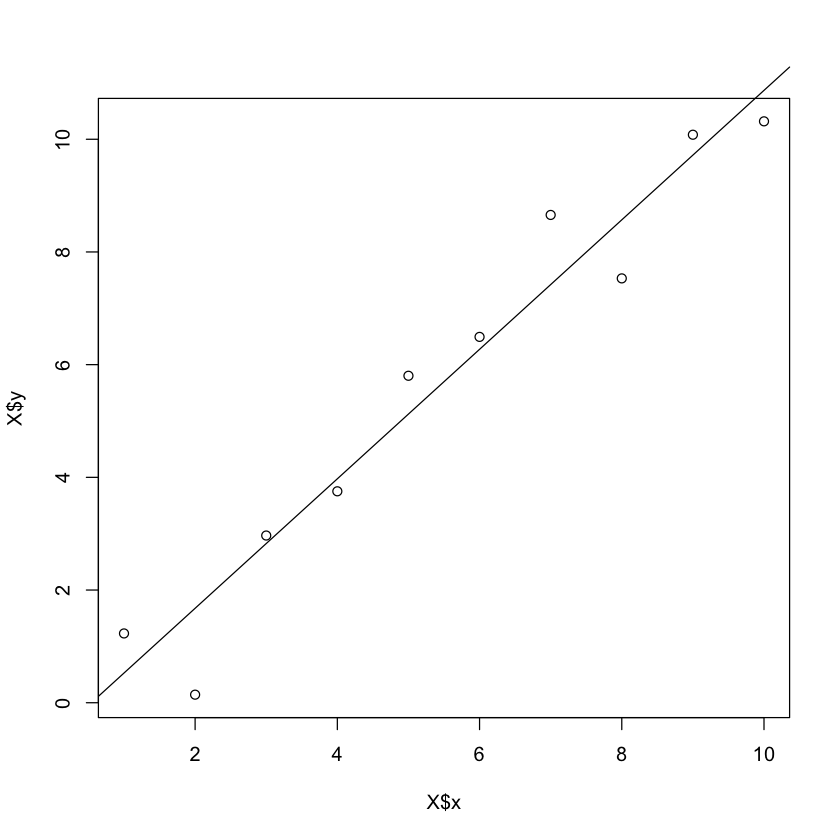

In [50]:
# Tracé
X <- read.table("ex12.7.1.dat", header = TRUE)
plot(X$x, X$y)
par(mar = c(5, 4, 1, 1) + 0.1)
#parameters from the figure
out <- lm(y ~ x, X)
abline(out)

In [51]:
#Réumé du model
summary(out)


Call:
lm(formula = y ~ x, data = X)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.5329 -0.4676  0.1816  0.6002  1.2360 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.62181    0.61404  -1.013    0.341    
x            1.14895    0.09896  11.610 2.76e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8989 on 8 degrees of freedom
Multiple R-squared:  0.944,	Adjusted R-squared:  0.937 
F-statistic: 134.8 on 1 and 8 DF,  p-value: 2.756e-06


** Predict renvoie les points prévus par le model**

In [52]:
predict(out)

1          2          3          4          5          6          7 
 0.5271433  1.6760964  2.8250494  3.9740024  5.1229555  6.2719085  7.4208616 
         8          9         10 
 8.5698146  9.7187676 10.8677207

**Predict the new data**

In [75]:
newdata = data.frame(x = 2.5)
predict(out, newdata)

1 
2.250573

**predict(out) correspond aux yi**

erreur (prédit - observé

In [58]:
#Fonction de cout simple
sum((predict(out) - X$x)^2 )

[1] 2.220222

### Overfitting

**Création modèles polynomiaux à 8 parametres**

In [59]:
out.poly <- lm(y ~ poly(x, 8, raw = T), data = X)
summary(out.poly)


Call:
lm(formula = y ~ poly(x, 8, raw = T), data = X)

Residuals:
        1         2         3         4         5         6         7         8 
 0.004959 -0.044634  0.178537 -0.416586  0.624878 -0.624878  0.416586 -0.178537 
        9        10 
 0.044634 -0.004959 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)
(Intercept)           5.096e+00  1.051e+02   0.048    0.969
poly(x, 8, raw = T)1  5.654e+00  2.602e+02   0.022    0.986
poly(x, 8, raw = T)2 -2.320e+01  2.483e+02  -0.093    0.941
poly(x, 8, raw = T)3  2.012e+01  1.224e+02   0.164    0.896
poly(x, 8, raw = T)4 -7.958e+00  3.474e+01  -0.229    0.857
poly(x, 8, raw = T)5  1.696e+00  5.889e+00   0.288    0.821
poly(x, 8, raw = T)6 -2.010e-01  5.883e-01  -0.342    0.790
poly(x, 8, raw = T)7  1.246e-02  3.193e-02   0.390    0.763
poly(x, 8, raw = T)8 -3.146e-04  7.252e-04  -0.434    0.739

Residual standard error: 1.094 on 1 degrees of freedom
Multiple R-squared:  0.9896,	Adjusted R-squared:  0.9067 


### Prédiction avec valeur polynomial + tracé

In [66]:
#range  de 100 valeurs  de 1 à 10
# pour tracer ton x (valeurs à prédire)
xt = seq(1,10,length = 100)

In [76]:
predict(out.poly, newdata)

1 
1.481375

** ploter les deux modèles **

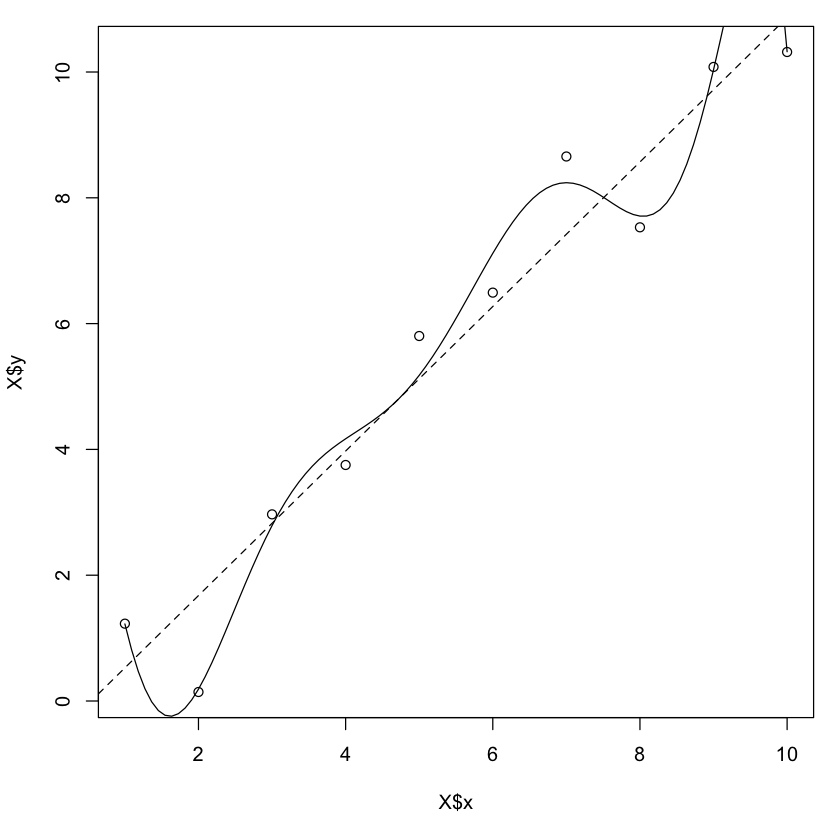

In [74]:
par(mar = c(5, 4, 1, 1) + 0.1)
plot(X$x, X$y)
lines(xt,predict(out.poly, data.frame(x = xt)) )
abline(out, lty = 2)

## Model selection

**Anova de comparaison des modèles**

In [78]:
anova(out, out.poly)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
1,8,6.463677,NA,NA,NA,NA
2,1,1.195818,7,5.267859,0.6293195,0.7521425


In [79]:
out$coefficients
out.poly$coefficients

(Intercept)           x 
 -0.6218097   1.1489530

(Intercept) poly(x, 8, raw = T)1 poly(x, 8, raw = T)2 
        5.096131e+00         5.653964e+00        -2.319501e+01 
poly(x, 8, raw = T)3 poly(x, 8, raw = T)4 poly(x, 8, raw = T)5 
        2.012052e+01        -7.958334e+00         1.696393e+00 
poly(x, 8, raw = T)6 poly(x, 8, raw = T)7 poly(x, 8, raw = T)8 
       -2.010259e-01         1.245802e-02        -3.146267e-04

**Montre le détail des calcults de F pour cette anova**

In [80]:
RSS1 = sum( (predict(out) - X$y)^2 )
RSS2 = sum( (predict(out.poly) - X$y)^2 )
p1 = length(out$coefficients)
p2 = length(out.poly$coefficients)
n = nrow(X)
Ft = ((RSS1 - RSS2) / (p2-p1)) / (RSS2 / (n - p2))
Ft


[1] 0.6293195

** En gros ici p value 0.75, donc les deux modèles sont identiques  donc choisir le plus simple**

## Exercices

###Modèles à un facteur

In [130]:
data1=read.table("data1.txt", header = T)

In [83]:
summary(data1)

       y                  x.1                x.2                x.3          
 Min.   :-10.73131   Min.   :-2.00714   Min.   :-2.98962   Min.   :-3.64458  
 1st Qu.: -2.59005   1st Qu.:-0.62991   1st Qu.:-0.65910   1st Qu.:-0.70100  
 Median :  0.22498   Median :-0.03744   Median :-0.10335   Median :-0.10001  
 Mean   : -0.04318   Mean   :-0.02107   Mean   :-0.02486   Mean   :-0.04494  
 3rd Qu.:  2.37389   3rd Qu.: 0.68079   3rd Qu.: 0.52877   3rd Qu.: 0.68776  
 Max.   : 11.47981   Max.   : 2.58260   Max.   : 3.21696   Max.   : 2.46270  
      x.4                x.5                x.6                x.7            
 Min.   :-2.70489   Min.   :-2.31512   Min.   :-2.95115   Min.   :-3.0072744  
 1st Qu.:-0.61854   1st Qu.:-0.61279   1st Qu.:-0.64784   1st Qu.:-0.7323983  
 Median : 0.07012   Median : 0.04140   Median :-0.14719   Median :-0.0006434  
 Mean   : 0.04787   Mean   : 0.04288   Mean   :-0.08779   Mean   :-0.0266807  
 3rd Qu.: 0.70061   3rd Qu.: 0.69331   3rd Qu.: 0.52620   3

In [92]:
mod1=lm(data1$y ~ data1$x.1)

In [99]:
summary(mod1)


Call:
lm(formula = data1$y ~ data1$x.1)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.8301  -2.4505   0.2242   2.4013  11.0532 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept) -0.04999    0.27721  -0.180    0.857
data1$x.1   -0.32305    0.28783  -1.122    0.263

Residual standard error: 3.919 on 198 degrees of freedom
Multiple R-squared:  0.006322,	Adjusted R-squared:  0.001303 
F-statistic:  1.26 on 1 and 198 DF,  p-value: 0.2631


**a pas l'air significatif !**

pas différent de 0 si pas significatif

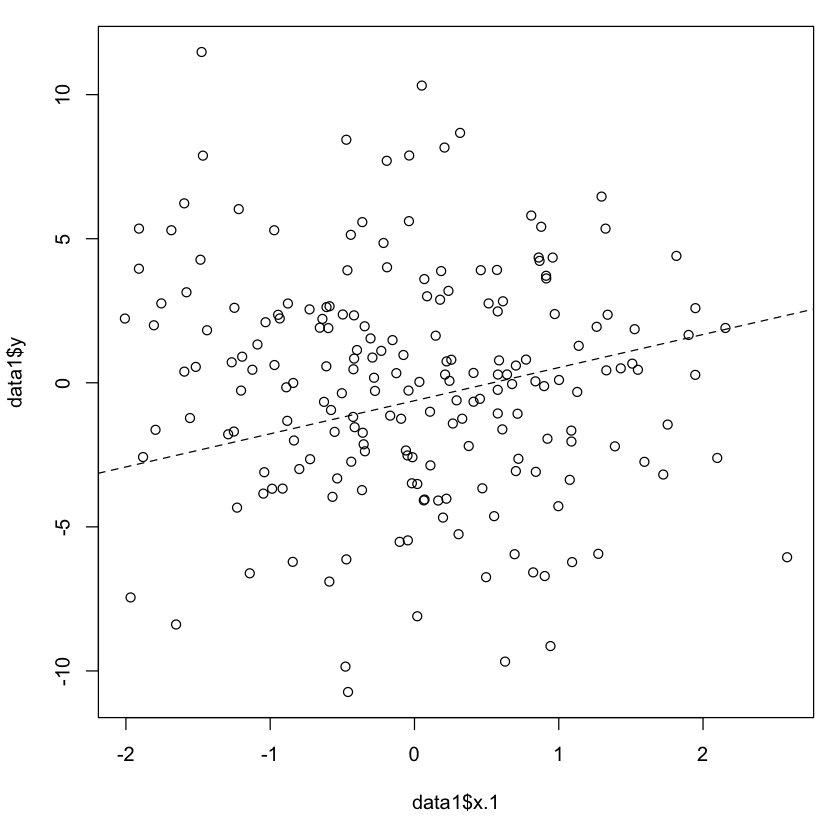

In [94]:
par(mar = c(5, 4, 1, 1) + 0.1)
plot(data1$x.1, data1$y)
abline(out, lty = 2)

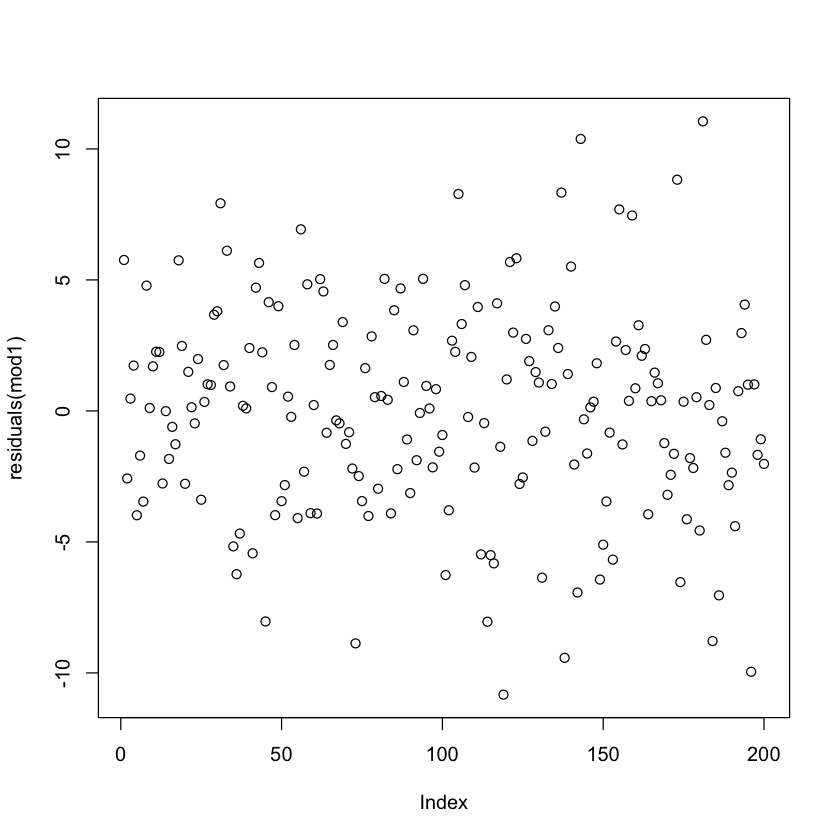

In [96]:
plot(residuals(mod1))

In [101]:
mod0=lm(data1$y ~ 1)

In [102]:
anova(mod0,mod1)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
1,199,3061.06,NA,NA,NA,NA
2,198,3041.708,1,19.35196,1.259716,0.2630641


** N'explique pas plus que le modèle à 0 facteurs **

In [103]:
RSS1 = sum( (predict(mod0) - data1$y)^2 )
RSS2 = sum( (predict(mod1) - data1$y)^2 )
p1 = length(mod0$coefficients)
p2 = length(mod1$coefficients)
n = nrow(data1)
Ft = ((RSS1 - RSS2) / (p2-p1)) / (RSS2 / (n - p2))
Ft

[1] 1.259716

## Modèles à deux facteurs

In [109]:
mod13 = lm (data1$y ~ data1$x.1 + data1$x.3)

In [110]:
summary(mod13)


Call:
lm(formula = data1$y ~ data1$x.1 + data1$x.3)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.2592 -1.5817 -0.2573  1.7122  6.4963 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.0857     0.1597   0.537   0.5921    
data1$x.1    -0.3384     0.1656  -2.043   0.0424 *  
data1$x.3     3.0266     0.1512  20.020   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.256 on 197 degrees of freedom
Multiple R-squared:  0.6725,	Adjusted R-squared:  0.6692 
F-statistic: 202.3 on 2 and 197 DF,  p-value: < 2.2e-16


In [111]:
mod31=lm (data1$y ~ data1$x.3 + data1$x.1)

In [112]:
summary(mod31)


Call:
lm(formula = data1$y ~ data1$x.3 + data1$x.1)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.2592 -1.5817 -0.2573  1.7122  6.4963 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.0857     0.1597   0.537   0.5921    
data1$x.3     3.0266     0.1512  20.020   <2e-16 ***
data1$x.1    -0.3384     0.1656  -2.043   0.0424 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.256 on 197 degrees of freedom
Multiple R-squared:  0.6725,	Adjusted R-squared:  0.6692 
F-statistic: 202.3 on 2 and 197 DF,  p-value: < 2.2e-16


In [113]:
anova(mod1,mod13)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
1,198,3041.708,NA,NA,NA,NA
2,197,1002.402,1,2039.306,400.7806,2.267038e-49


In [115]:
modall = lm(data1$y ~ ., data = data1, x = TRUE)

In [116]:
summary(modall)


Call:
lm(formula = data1$y ~ ., data = data1, x = TRUE)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.77387 -0.77001 -0.04984  0.64782  2.55638 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.010377   0.072439   0.143  0.88624    
x.1          0.069567   0.077780   0.894  0.37224    
x.2         -0.083298   0.079931  -1.042  0.29868    
x.3          2.999157   0.069927  42.890  < 2e-16 ***
x.4          0.004275   0.077015   0.056  0.95579    
x.5          2.032517   0.074988  27.105  < 2e-16 ***
x.6          0.047211   0.080086   0.589  0.55623    
x.7         -0.194187   0.069499  -2.794  0.00574 ** 
x.8         -0.024929   0.071806  -0.347  0.72884    
x.9          0.192259   0.072460   2.653  0.00865 ** 
x.10        -0.069216   0.067438  -1.026  0.30603    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.015 on 189 degrees of freedom
Multiple R-squared:  0.9364,	Adjusted R-squared:  0

In [117]:
mod3=lm (data1$y ~ data1$x.3)
mod5=lm (data1$y ~ data1$x.5)
mod35=lm (data1$y ~ data1$x.3 +data1$x.5)

In [118]:
anova(mod3,mod35)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
1,198,1023.643,NA,NA,NA,NA
2,197,214.5695,1,809.0733,742.8244,9.214733e-69


In [119]:
anova(mod5,mod35)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
1,198,2201.432,NA,NA,NA,NA
2,197,214.5695,1,1986.862,1824.173,1.510654e-101


## Ridge Regression

In [121]:
library(MASS)

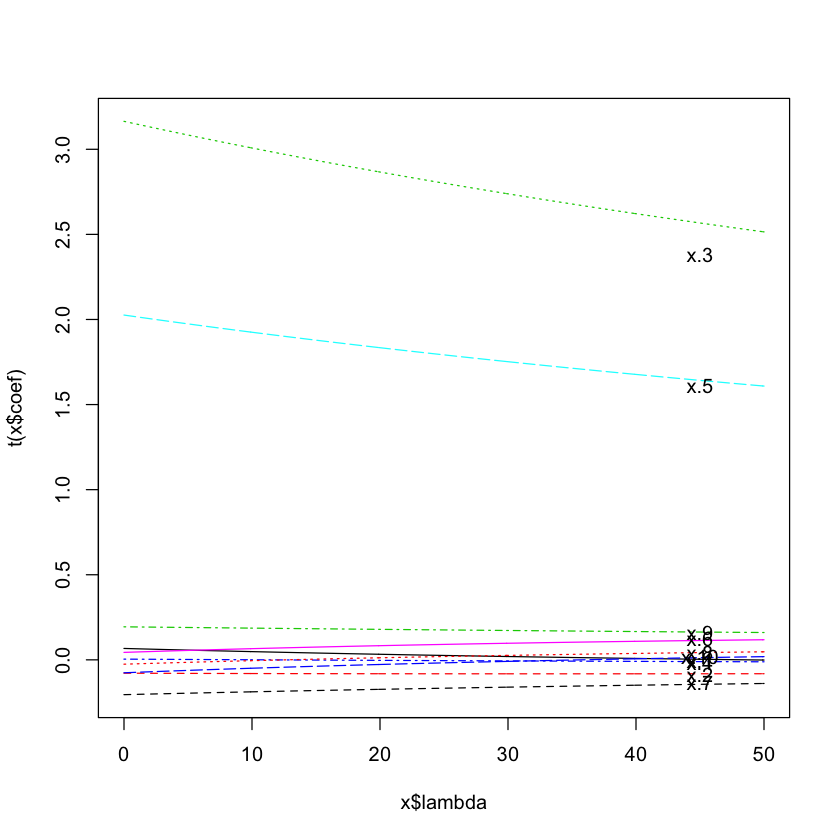

In [123]:
modridge = lm.ridge(y ~ .,data1,lambda=seq(0,50,by=0.1))
plot(modridge)
text(rep(45,10), coef(modridge)[length(seq(0,50,0.1)),-1], colnames(data1)[2:11])


##Elastatic net

In [124]:
library(glmnet)

Warning message:
: package ‘glmnet’ was built under R version 3.2.4Loading required package: Matrix
Loading required package: foreach
Loaded glmnet 2.0-5



Deux possibilités soit L1 norm soit (log lambda),, deux ecriture mathématiques qui veulent dire la même chose. Mais pour nous plus compréhensibles comme le log de lambda (option2)

In [140]:
fit=glmnet(as.matrix(data1[,2:11]),data1$y)

ici par défaut on est dans du lasso car la valeur par défaut de alpha est de 1.

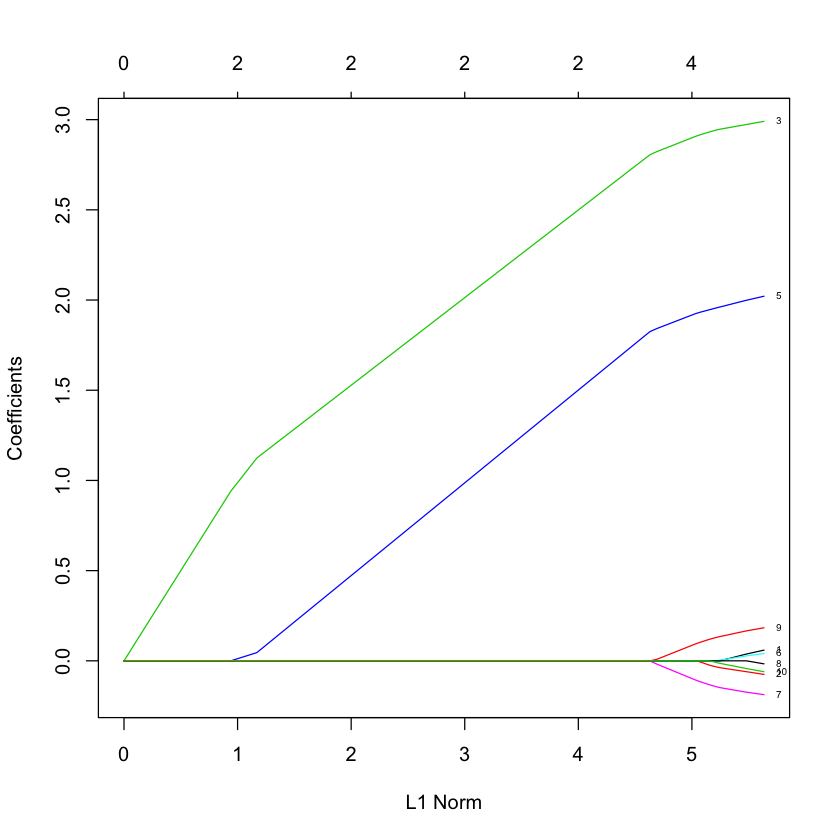

In [142]:
plot(fit,label=TRUE)

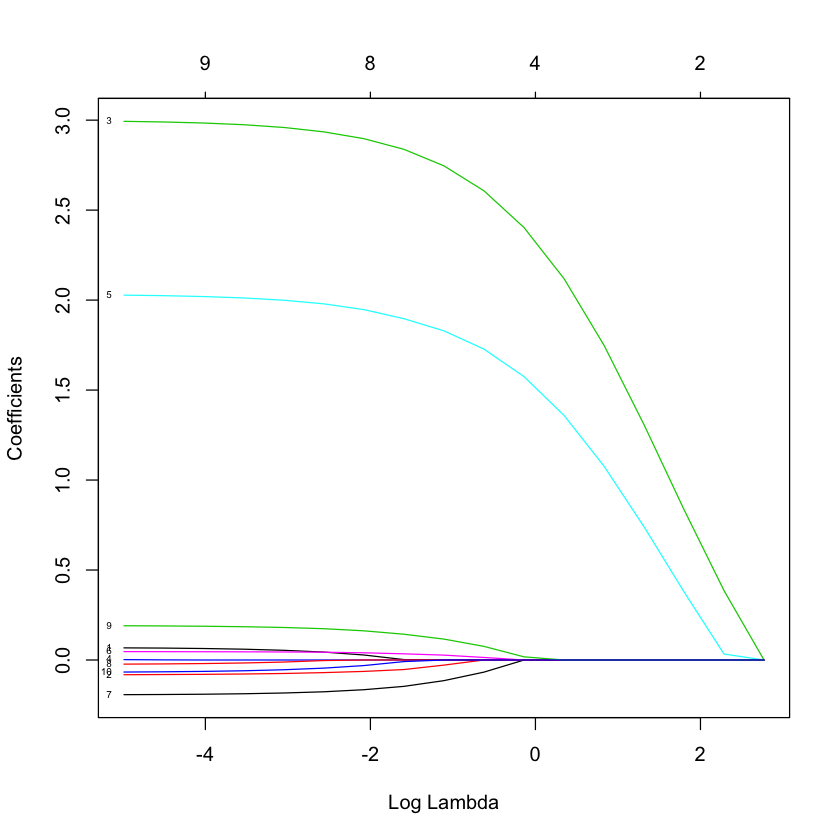

In [144]:
fit = glmnet(as.matrix(data1[,2:11]), data1$y, alpha = 0.2, nlambda = 20)
plot(fit, xvar = "lambda", label = TRUE)


** Pour choisir le lambda **
nfolds correspondau % de données utiliser pour le train
type.measure c'est mean standard error

In [146]:
cvfit = cv.glmnet(as.matrix(data1[,2:11]),data1$y , type.measure = "mse", nfolds = 20)

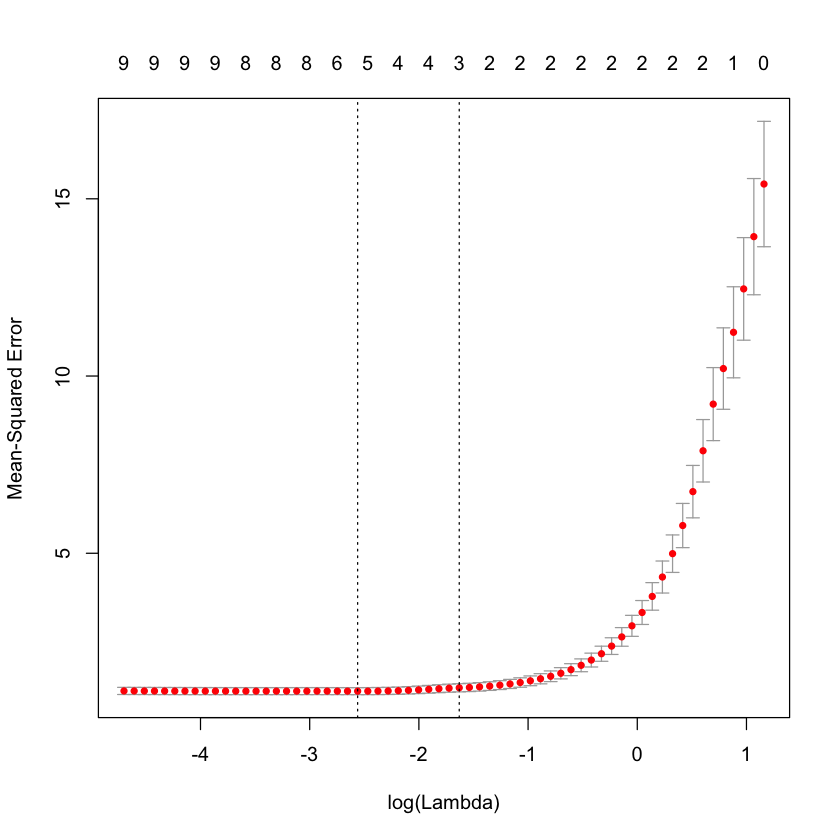

In [150]:
plot(cvfit)

In [166]:
cvfit$lambda.min

[1] 0.07724376

In [167]:
coef(cvfit, s = "lambda.min")

11 x 1 sparse Matrix of class "dgCMatrix"
                       1
(Intercept)  0.004769814
x.1          .          
x.2         -0.013845299
x.3          2.922736791
x.4          .          
x.5          1.938323776
x.6          .          
x.7         -0.122982706
x.8          .          
x.9          0.109939833
x.10         .          

In [ ]:
Donne les coefficients finaux du modèle avec le meilleur lambda (en a mis plusieurs à zero )

In [152]:
coef(cvfit, s = "lambda.min")

11 x 1 sparse Matrix of class "dgCMatrix"
                       1
(Intercept)  0.004769814
x.1          .          
x.2         -0.013845299
x.3          2.922736791
x.4          .          
x.5          1.938323776
x.6          .          
x.7         -0.122982706
x.8          .          
x.9          0.109939833
x.10         .          

## Prostate dataset

En gros, il faut tester plusieurs modeles, et ensuite voir si des trucs ressortent, pour choisir les variables qui marchent bien. La on est que dans du linéaire.

In [156]:
prostate_C=read.table("prostate.txt", header = T)

In [158]:
head(prostate)

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa
1,-0.5798185,2.769459,50,-1.386294,0,-1.386294,6,0,-0.4307829
2,-0.9942523,3.319626,58,-1.386294,0,-1.386294,6,0,-0.1625189
3,-0.5108256,2.691243,74,-1.386294,0,-1.386294,7,20,-0.1625189
4,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0,-0.1625189
5,0.7514161,3.432373,62,-1.386294,0,-1.386294,6,0,0.3715636
6,-1.049822,3.228826,50,-1.386294,0,-1.386294,6,0,0.7654678


In [157]:
prostate=prostate_C[,c(1:9)]

In [159]:
modall = lm(prostate$lpsa ~ ., data = prostate, x = TRUE)

In [160]:
summary(modall)


Call:
lm(formula = prostate$lpsa ~ ., data = prostate, x = TRUE)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.76644 -0.35510 -0.00328  0.38087  1.55770 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.181561   1.320568   0.137  0.89096    
lcavol       0.564341   0.087833   6.425 6.55e-09 ***
lweight      0.622020   0.200897   3.096  0.00263 ** 
age         -0.021248   0.011084  -1.917  0.05848 .  
lbph         0.096713   0.057913   1.670  0.09848 .  
svi          0.761673   0.241176   3.158  0.00218 ** 
lcp         -0.106051   0.089868  -1.180  0.24115    
gleason      0.049228   0.155341   0.317  0.75207    
pgg45        0.004458   0.004365   1.021  0.31000    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6995 on 88 degrees of freedom
Multiple R-squared:  0.6634,	Adjusted R-squared:  0.6328 
F-statistic: 21.68 on 8 and 88 DF,  p-value: < 2.2e-16


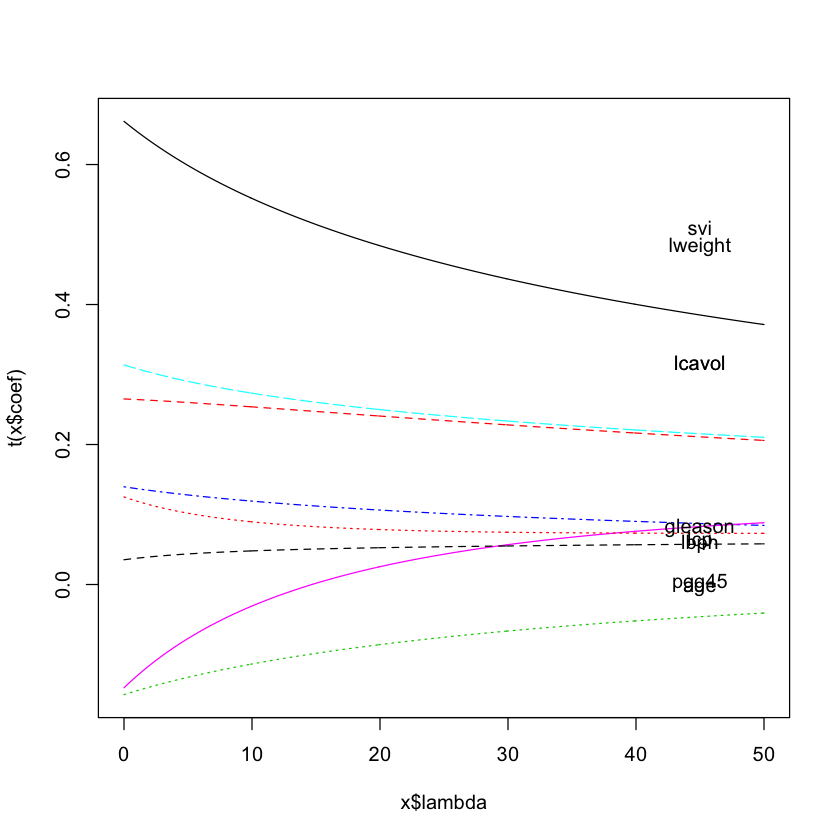

In [176]:
modridge = lm.ridge(lpsa ~ .,prostate,lambda=seq(0,50,by=0.1))
plot(modridge)
text(rep(45,9), coef(modridge)[length(seq(0,50,0.1)),-1], colnames(prostate)[1:8])

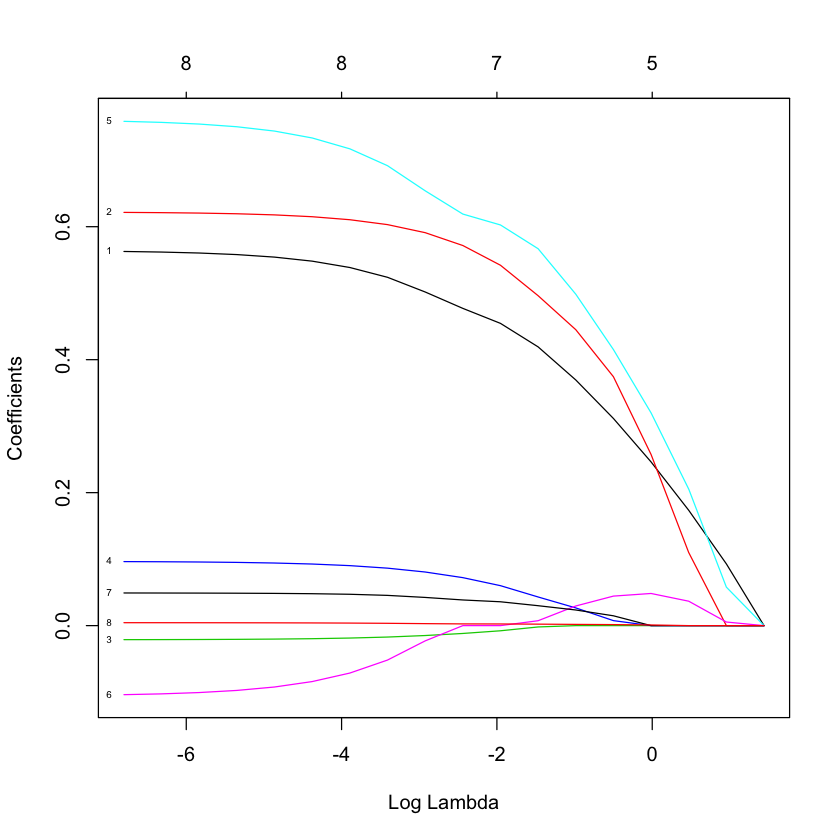

In [168]:
fit = glmnet(as.matrix(prostate[,1:8]), prostate$lpsa, alpha = 0.2, nlambda = 20)
plot(fit, xvar = "lambda", label = TRUE)

In [177]:
cvfit = cv.glmnet(as.matrix(prostate[,1:8]),prostate$lpsa , type.measure = "mse", nfolds = 20)

In [178]:
cvfit$lambda.min
coef(cvfit, s = "lambda.min")

[1] 0.03250172

9 x 1 sparse Matrix of class "dgCMatrix"
                       1
(Intercept)  0.161190494
lcavol       0.508157223
lweight      0.552486890
age         -0.009374709
lbph         0.064736544
svi          0.594693520
lcp          .          
gleason      0.004797185
pgg45        0.002351087

In [ ]:
predict(cvfit,newx=as.matrix(data2[,c(1,2,5)]),s = "lambda.min")